In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline

In [2]:
df=pd.read_csv("D:\house_price_prediction\data\data.csv")

In [3]:
df

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


# Average Rent

Let's now manipulate data to get some good insights about rent, it's trends and behaviour.
First thing that comes to my mind is calculating and visualizing average rent of each city.

In [4]:
#lets make a copy of dataframe
df_copy_1=df.copy()

In [5]:
#now lets add month,year column to our data frame
df_copy_1["Posted On"]=pd.to_datetime(df_copy_1['Posted On'])
df_copy_1["Year"]=df_copy_1["Posted On"].dt.year
df_copy_1["Month"]=df_copy_1["Posted On"].dt.strftime('%B')

In [6]:
df_copy_1

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Year,Month
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,2022,May
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,2022,May
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,2022,May
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,2022,July
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,2022,May
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner,2022,May
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner,2022,May
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent,2022,July
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent,2022,July


In [7]:
#Now let's make different combination of city and month to plot average rent of houses in each city with month
avg_rent_df=df_copy_1.groupby(['City','Month'])["Rent"].mean().reset_index()

In [8]:
avg_rent_pivot=avg_rent_df.pivot(columns="City",index="Month",values="Rent")

In [9]:
avg_rent_pivot

City,Bangalore,Chennai,Delhi,Hyderabad,Kolkata,Mumbai
Month,,,,,,
April,15157.317073,10591.666667,20009.090909,16406.250000,12766.463415,37814.285714
July,30895.588235,28838.691176,29934.736842,29484.372197,14480.000000,93637.461818
June,30379.398860,20631.570571,36055.339806,20179.322034,11769.811321,86724.958435
May,18530.114525,18941.060606,25914.859438,15059.330189,10451.132948,80584.588933


<Figure size 1400x700 with 0 Axes>

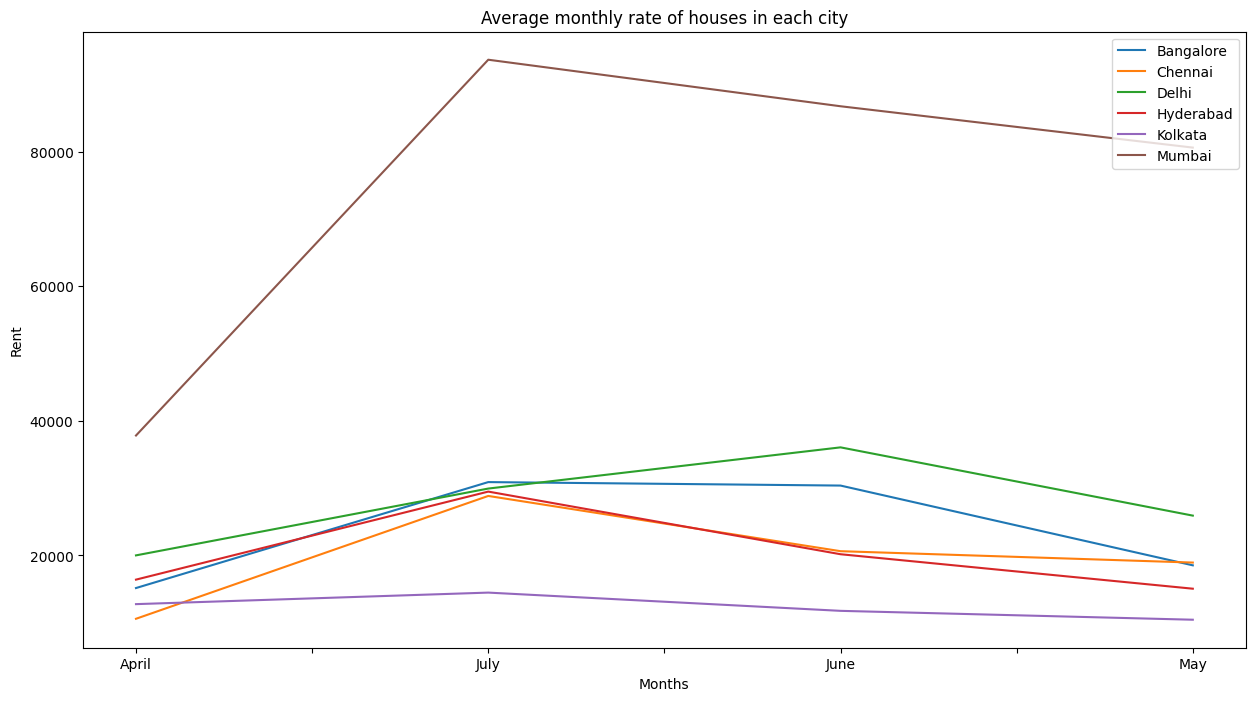

In [10]:
plt.figure(figsize=(14,7))
avg_rent_pivot.plot(figsize=(15,8))
plt.title("Average monthly rate of houses in each city")
plt.xlabel("Months")
plt.ylabel("Rent")
plt.legend(loc="upper right")
plt.show()

### Conclusion:
- Mumbai have highest average rent , its rent peaked in july
- Kolkata is cheapest city according to average rent
- Lowest rent was of Chennai in April and Kolkata in May
- Delhi average rent keep rising till june then its declined
- Kolkata average rent kept declining

## Basis of area type
Lets plot data on basis of area type according to cities

In [11]:
avg_rent_area_df=df_copy_1.groupby(["City","Area Type"])["Rent"].mean().reset_index()

In [12]:
avg_rent_area_pivot=avg_rent_area_df.pivot(columns="City",index="Area Type",values="Rent")

<Figure size 1800x900 with 0 Axes>

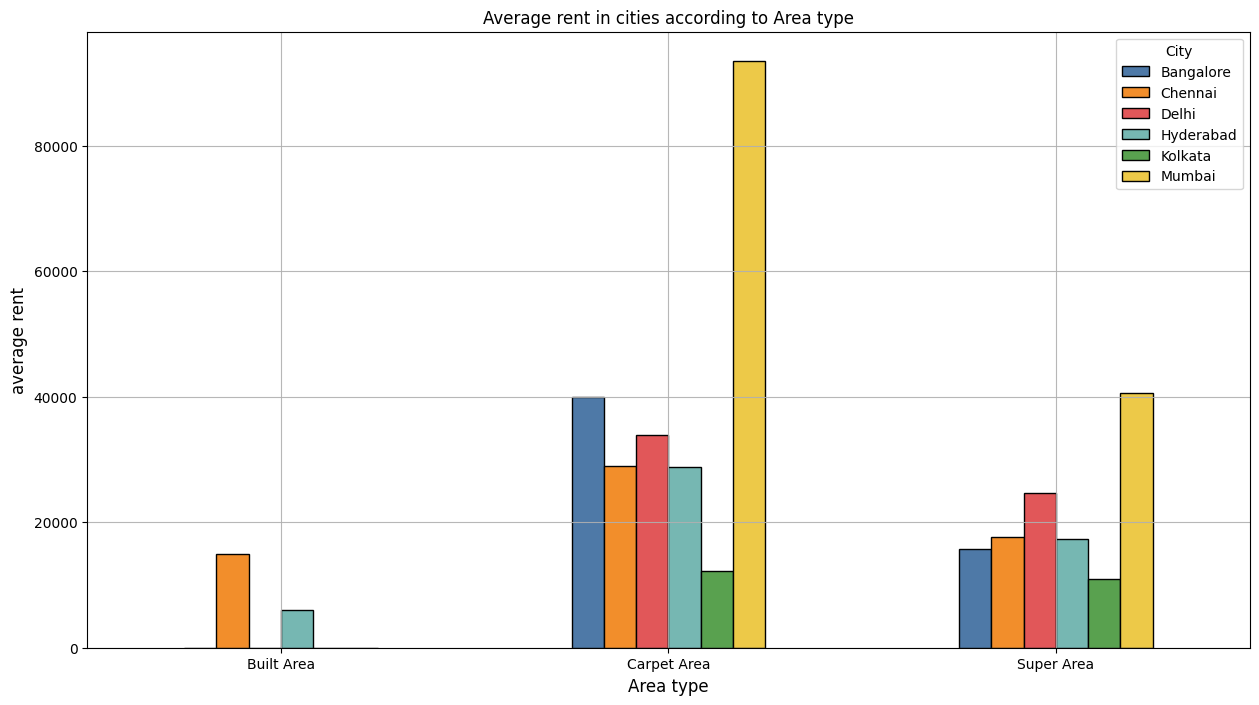

In [13]:
colors = ['#4e79a7', '#f28e2b', '#e15759', '#76b7b2', '#59a14f', '#edc948']
plt.figure(figsize=(18,9))
avg_rent_area_pivot.plot(kind="bar",figsize=(15,8),edgecolor='black',color=colors)
plt.title("Average rent in cities according to Area type")
plt.grid(linestyle='-', alpha=0.9)
plt.xlabel("Area type",fontsize=12)
plt.xticks(rotation=0)
plt.ylabel("average rent",fontsize=12)
plt.show()

### Conclusion:
- Carpet area in mumbai is most costly followed by banglore
- Super area in Delhi is second most costly
- Kolkata offer cheapest carpet and super area
- Only chennai and hyderabad have built area
- South indian cities only have built area
- Hyderabad is cheaper in comparison to chennai

## Mumbai city analysis:
Here we will only visualize data about mumbai city only.
Our goals would be to find out about areas where plots are cheapest and where they are most costly.
We will look into reasons for there cost like size, BHK, number of bathrooms etc


In [14]:
mumbai_df=df_copy_1[df_copy_1["City"]=="Mumbai"]

In [15]:
#Let's check out unique area names of mumbai
len(mumbai_df['Area Locality'].unique())

604

In [16]:
len(mumbai_df)

972

In [17]:
mumbai_df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Year,Month
524,2022-05-16,1,25000,320,2 out of 7,Super Area,"Shaheen Apartment, Andheri West",Mumbai,Semi-Furnished,Bachelors/Family,1,Contact Owner,2022,May
525,2022-06-14,2,70000,750,4 out of 10,Carpet Area,Santacruz West,Mumbai,Furnished,Bachelors/Family,2,Contact Agent,2022,June
526,2022-05-26,1,45000,450,7 out of 10,Carpet Area,"Rose Queen, Old Khar",Mumbai,Furnished,Bachelors/Family,1,Contact Agent,2022,May
527,2022-05-27,3,75000,1100,2 out of 13,Carpet Area,"Sabari Palm View, Chembur",Mumbai,Unfurnished,Family,3,Contact Agent,2022,May
528,2022-06-07,1,14000,640,6 out of 7,Super Area,Mira Road,Mumbai,Furnished,Bachelors/Family,1,Contact Owner,2022,June


In [18]:
#lets make dataframe with unique area locality and calculate there average rent
locality_mumbai_df= mumbai_df.groupby("Area Locality")["Rent"].mean().reset_index().sort_values(by="Rent",ascending=False)

In [19]:
locality_mumbai_df

,Area Locality,Rent
409,"Raheja Artesia, Worli",1000000.0
267,"Lady Ratan Tower, Worli",700000.0
52,Bandra East,600000.0
343,"Mount Marry, Bandra West",600000.0
21,Altamount Road,500000.0
...,...,...
117,"Deep Heights, Nalasopara",6500.0
355,Naigaon East,6000.0
497,"Sonal Apartment, Bhandari Compound",6000.0
323,"Manibhadra Avenue, Morya Nagar",5500.0


In [20]:
top_locality_mumbai=locality_mumbai_df.nlargest(30,"Rent")

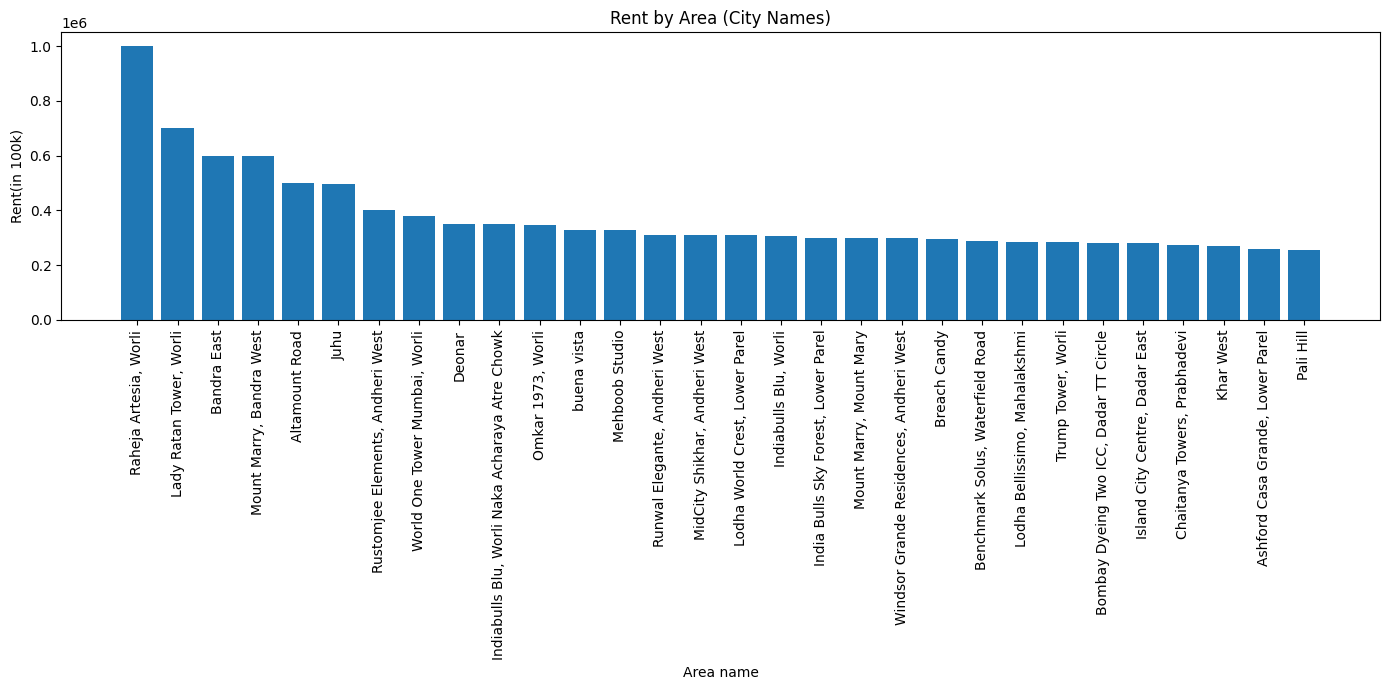

In [21]:
plt.figure(figsize=(14,7))
plt.bar(top_locality_mumbai["Area Locality"],top_locality_mumbai["Rent"])
plt.xlabel("Area name")
plt.ylabel("Rent(in 100k)")
plt.title('Rent by Area (City Names)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [22]:
#Now let's plot chepaest one
cheapest_locality_mumbai=locality_mumbai_df.nsmallest(30,"Rent")

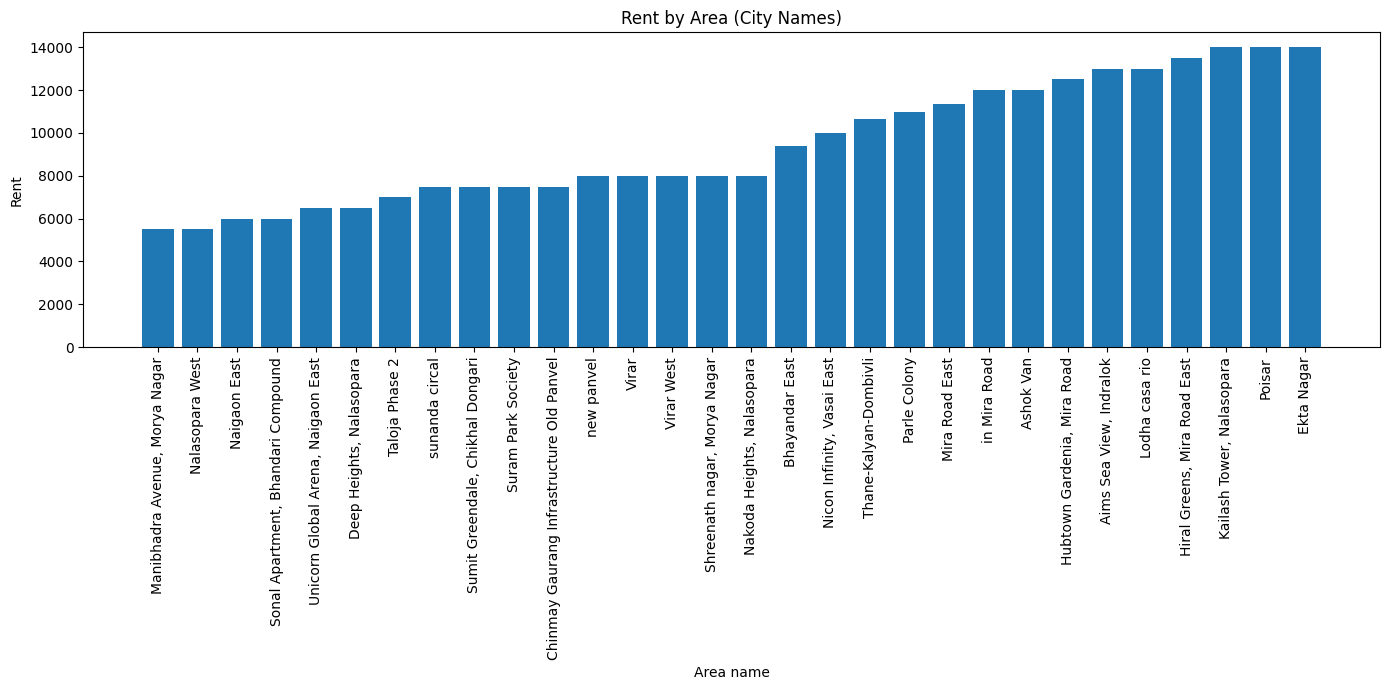

In [23]:
plt.figure(figsize=(14,7))
plt.bar(cheapest_locality_mumbai["Area Locality"],cheapest_locality_mumbai["Rent"])
plt.xlabel("Area name")
plt.ylabel("Rent")
plt.title('Rent by Area (City Names)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Conclusion:
- "Raheja Artesia, Worli" is most costly area in mumbai with average rent of 1 lakh
- the second most costly area have average rent of 60k at "Lady Ratan Tower"
- After that all average range from 50k to 20k
- Cheapest one is in "Manibhadra Avenue,Moya Nagar" and "Nalasopara west" at 5000
- All other cheap one range from 5000-15000

### Next step:
Now we gonna plot a boxplot for mumbai city plots, so we can learn more about distribution of rent

In [24]:
import seaborn as sns

In [25]:
carpet_df=mumbai_df[mumbai_df["Area Type"]=="Carpet Area"]
super_df=mumbai_df[mumbai_df["Area Type"]=="Super Area"]

In [26]:
from matplotlib.ticker import FuncFormatter


In [27]:
def y_ticks_format(value, pos):
    return f'{int(value):,}'  # Format with commas


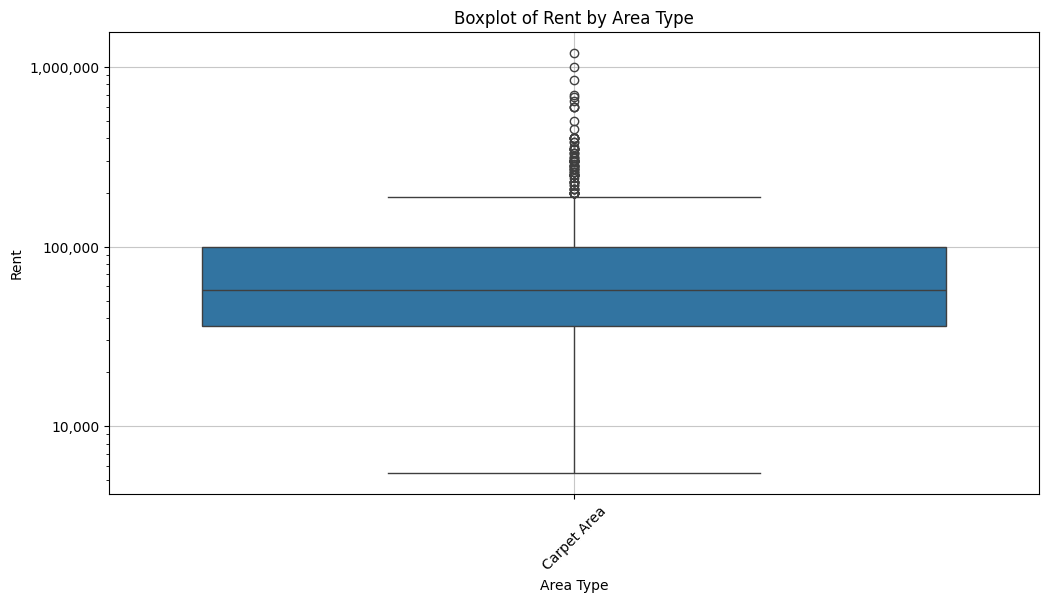

In [28]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Area Type', y='Rent', data=carpet_df,hue="Area Type")

plt.title('Boxplot of Rent by Area Type')
plt.xlabel('Area Type')
plt.ylabel('Rent')
plt.yscale('log')
plt.gca().yaxis.set_major_formatter(FuncFormatter(y_ticks_format))

plt.xticks(rotation=45)
plt.grid(True, linestyle='-', alpha=0.7)

plt.show()

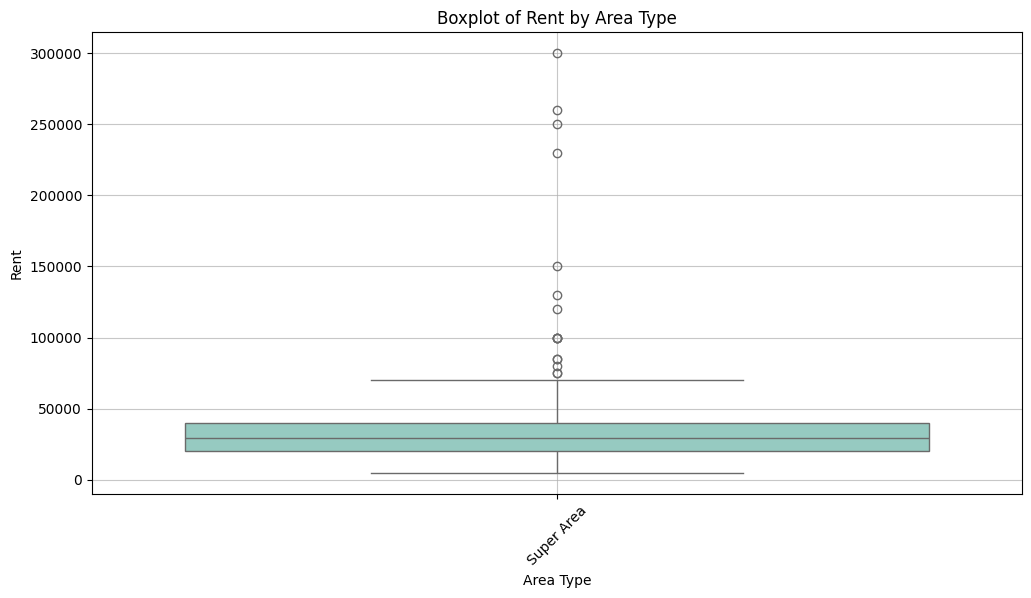

In [29]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Area Type', y='Rent', data=super_df, palette='Set3',hue="Area Type")

plt.title('Boxplot of Rent by Area Type')
plt.xlabel('Area Type')
plt.ylabel('Rent')
plt.xticks(rotation=45)
plt.grid(True, linestyle='-', alpha=0.7)

plt.show()

### Conclusion:
- We can notice that Carpet area plots are super costly, highest price go as high as 12 lakh where as lowest can go like 5500
- 75% plots are below 1 lakh price but mostly ranging from 60k to 1 lakh
- maximum goes like 3 lakh to 4 lakh whereas some outliers go till 10 lakh and above
- On other hand Super area are cheaper, Lowest go below 10k where highest only lie between 50000 to 1 lakh
- Outlier for super area gone up to 3 lakh only
  

### BHK wise analysis
Lets analyze plot price on basis of how many BHK it is and number of bathrooms

In [30]:
bhk_df=mumbai_df.groupby(["BHK","Bathroom"])["Rent"].mean().reset_index()

In [31]:
bhk_df

,BHK,Bathroom,Rent
0,1,1,27823.121387
1,1,2,31260.247788
2,1,4,40000.000000
3,2,1,36888.888889
4,2,2,56674.797101
5,2,3,84472.222222
6,2,4,100000.000000
7,3,2,91262.068966
8,3,3,114441.345679
9,3,4,181212.121212


In [35]:
bhk_pivot=bhk_df.pivot(columns="Bathroom",index="BHK",values="Rent")

In [56]:
modern_neutral_palette = [
    "#3f4a59",  # Charcoal Blue
    "#6c757d",  # Slate Gray
    "#9e9e9e",  # Gray
    "#bdc3c7",  # Light Gray
    "#ffffff",  # White
    "#f8f9fa",  # Very Light Gray
    "#495057",  # Dark Gray
    "#343a40"   # Dark Charcoal
]


<Figure size 1500x800 with 0 Axes>

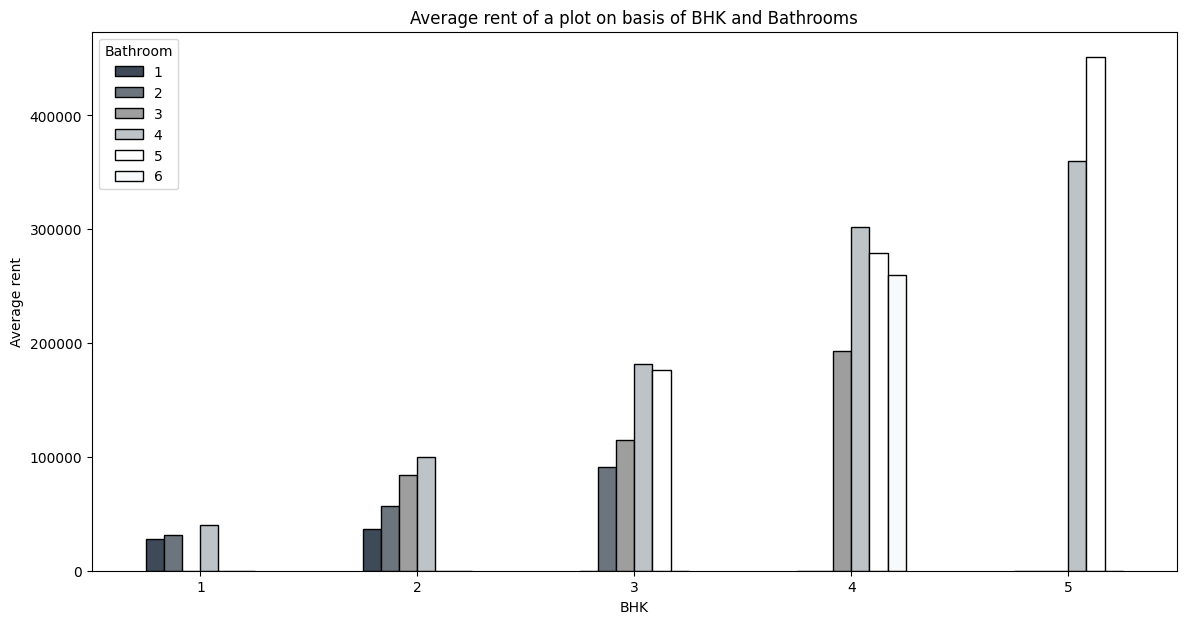

In [57]:
plt.figure(figsize=(15,8))
bhk_pivot.plot(kind="bar",figsize=(14,7),color=modern_neutral_palette,edgecolor="black")
plt.title("Average rent of a plot on basis of BHK and Bathrooms")
plt.xlabel("BHK")
plt.xticks(rotation=0)
plt.ylabel("Average rent")
plt.show()

### Size wise analysis
lets now analyze on basis of size,bhk etc

In [68]:
size_bhk_df=mumbai_df.groupby(["BHK","Size"])["Rent"].mean().reset_index()

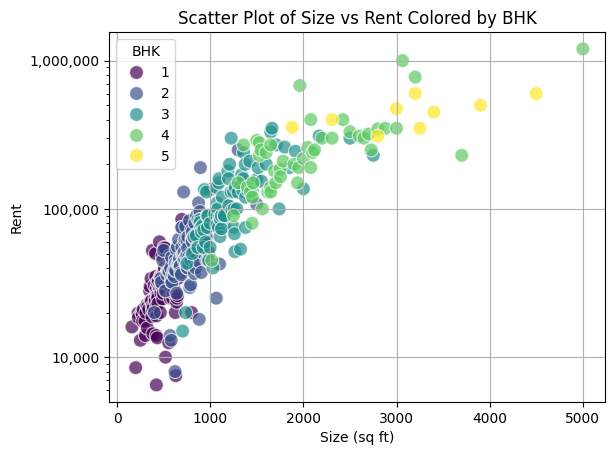

In [74]:
scatter = sns.scatterplot(data=size_bhk_df, x='Size', y='Rent', hue='BHK', palette='viridis', s=100, alpha=0.7)

plt.xlabel('Size (sq ft)')
plt.ylabel('Rent')
plt.title('Scatter Plot of Size vs Rent Colored by BHK')
#log transformed our y scale
plt.yscale('log')
plt.gca().yaxis.set_major_formatter(FuncFormatter(y_ticks_format))
# Show the plot
plt.grid(True)
plt.legend(title='BHK')
plt.show()

In [70]:
#Lets generate heatmap
corr = size_bhk_df.corr()


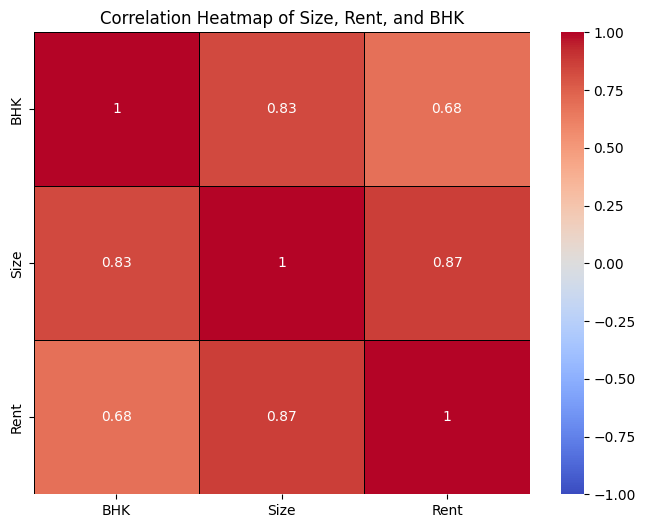

In [71]:
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, linewidths=0.5, linecolor='black')
plt.title('Correlation Heatmap of Size, Rent, and BHK')
plt.show()

### conclusion:
We can see from sctter plot that small sized plot with lower bhk have lower rent which is quiet obvious.
From heatmap we can conclude that size is more deciding factor for rent in comparison of BHK.

## City wise analysis

Let's analyze some relations city wise,starting with scatter plotting Size vs Rent with color grading of cities

In [92]:
#delhi,mumbai,kolkata
new_dmk=df_copy_1[df_copy_1["City"].isin(["Kolkata","Mumbai","Delhi"])]

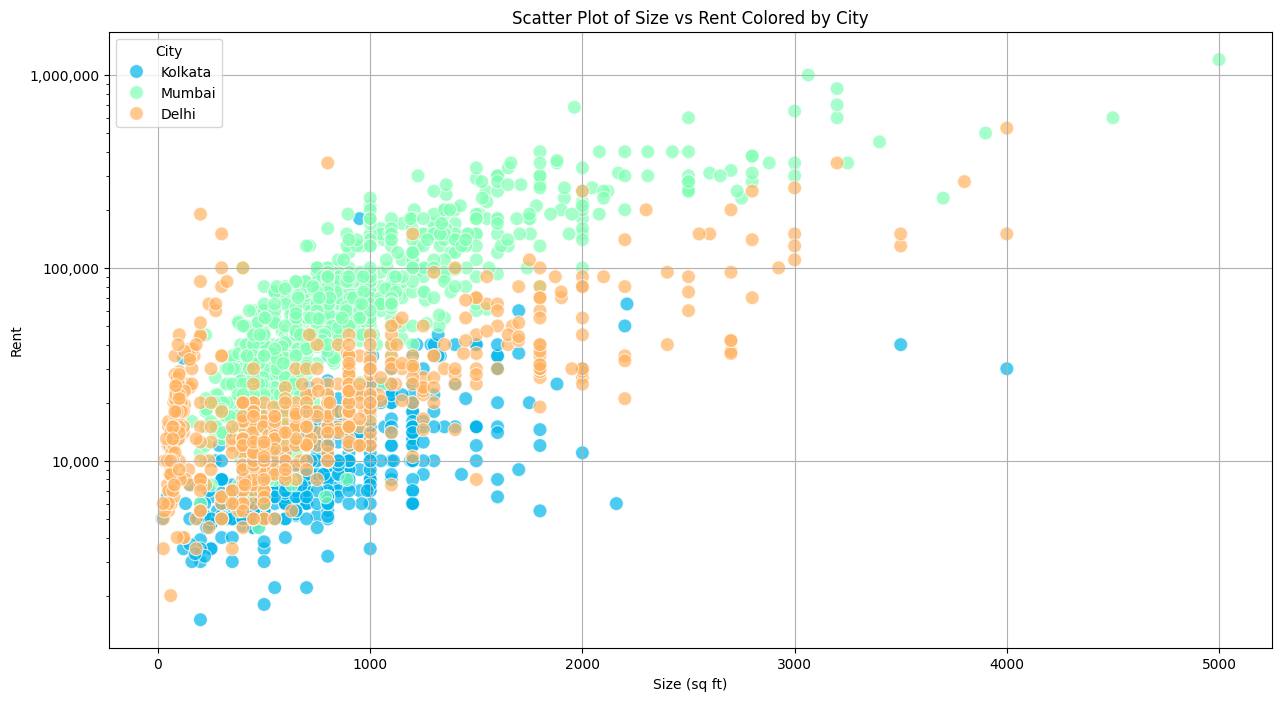

In [93]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="Size",y="Rent",data=new_dmk, hue='City', palette='rainbow', s=100, alpha=0.7)
plt.xlabel('Size (sq ft)')
plt.ylabel('Rent')
plt.title('Scatter Plot of Size vs Rent Colored by City')
#log transformed our y scale
plt.yscale('log')
plt.gca().yaxis.set_major_formatter(FuncFormatter(y_ticks_format))
# Show the plot
plt.grid(True)
plt.legend(title='City')
plt.show()

In [94]:
new_ch=df_copy_1[df_copy_1["City"].isin(["Hyderabad","Chennai"])]

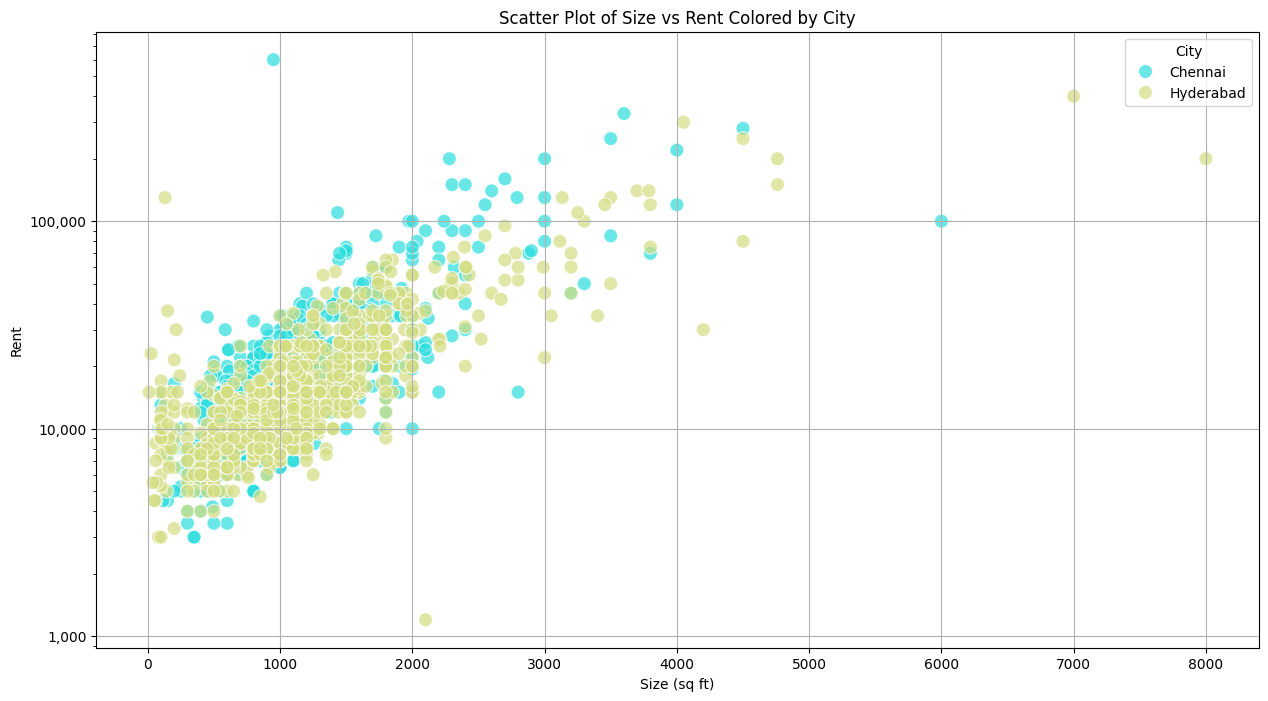

In [95]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="Size",y="Rent",data=new_ch, hue='City', palette='rainbow', s=100, alpha=0.7)
plt.xlabel('Size (sq ft)')
plt.ylabel('Rent')
plt.title('Scatter Plot of Size vs Rent Colored by City')
#log transformed our y scale
plt.yscale('log')
plt.gca().yaxis.set_major_formatter(FuncFormatter(y_ticks_format))
# Show the plot
plt.grid(True)
plt.legend(title='City')
plt.show()